In [1]:
from unityagents import UnityEnvironment
# from mlagents_envs.environment import UnityEnvironment
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = 'Reacher_Windows'
# f = 'Reacher_Windows_20'
# f = 'Reacher_Linux'
# f = 'Reacher_Linux_NoVis'
# f = 'Reacher_Linux_20'
# f = 'Reacher_Linux_NoVis_20'
no_graphics = False
env = UnityEnvironment(file_name='{}/Reacher'.format(f), seed=1,no_graphics=no_graphics, worker_id=4)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


## Runners

In [4]:
import tools as ts
from deep_rl import *

first = [
    {
     'fc1': 207, 'fc2': 216, 'fc3': 311, 
     'gradient_clip': 1.043616, 
     'target_network_mix': 0.000002,
     'discount': 0.445165,
     'actor_lr': 0.00001749, 'critic_lr': 0.00000012, 
     'weight_decay_act': 0.007017, 'weight_decay': 0.024510, 
     'target_network_mix': 0.000002,
    },
]

space_cfg = [        
        {'name' : 'fc1',             'type' : 'int', 'lb' : 200, 'ub' : 600, "step": 100},
        {'name' : 'fc2',             'type' : 'int', 'lb' : 100, 'ub' : 500, "step": 100},
        {'name' : 'fc3',             'type' : 'int', 'lb' : 50, 'ub' : 400, "step": 50},
    
        {'name' : 'gradient_clip',   'type' : 'num', 'lb' : 0.8, 'ub' : 15.0},
        {'name' : 'discount',        'type' : 'num', 'lb' : 0.4, 'ub' : 1.0},
        {'name' : 'target_network_mix',       'type' : 'pow', 'lb' : 1e-6, 'ub' : 1e-2},
    
        {'name' : 'actor_lr',        'type' : 'pow', 'lb' : 1e-6, 'ub' : 1e-2},
        {'name' : 'critic_lr',       'type' : 'pow', 'lb' : 1e-6, 'ub' : 1e-2},
    
        {'name' : 'weight_decay_act','type' : 'num', 'lb' : 0.0, 'ub' : 0.2},
        {'name' : 'weight_decay',    'type' : 'num', 'lb' : 0.0, 'ub' : 0.2},
    ]

In [6]:
config = ts.initConf_ddpg(state_size,action_size,brain_name,env)
# config.update_fields = [
#     'discount',
#     'target_network_mix',
#     'gradient_clip',
# ]
config.fc1 = 207
config.fc2 = 216
config.fc3 = 311
config.weight_decay_act = 0.007017
config.weight_decay = 0.024510
config.actor_lr = 0.00001749
config.critic_lr = 0.00000012
config.target_network_mix = 0.000002
config.discount = 0.445165
config.gradient_clip = 1.043616

config.batch_size = 128
config.max_steps = int(1e6)
config.memory_size = int(1e4)  
# config.act_clip = 9

Config.DEVICE = torch.device('cpu')
config.device = Config.DEVICE
config.eval_episodes = 400
config.scores_window = 40
best,scores = ts.tune(config, space_cfg, max_iter = 100, first = first)
print('\nBest:{}'.format(best) , flush = True)
# scores = brain(brain_name,agent,config,env)

Start[0]	fc1:207	fc2:216	fc3:311	a_W:0.00701700	c_W:0.02451000	a_Lr:0.00001749	c_Lr:0.00000012	tau:0.00000200	G:0.44516500	c_Clip:1.04361600	
Episode[0] 40	fc1:207	fc2:216	fc3:311	a_W:0.00701700	c_W:0.02451000	a_Lr:0.00001749	c_Lr:0.00000012	tau:0.00000200	G:0.44516500	c_Clip:1.04361600	 a-Average Score: 0.35
Finished![0] 80	fc1:207	fc2:216	fc3:311	a_W:0.00701700	c_W:0.02451000	a_Lr:0.00001749	c_Lr:0.00000012	tau:0.00000200	G:0.44516500	c_Clip:1.04361600	 a-Average Score: 0.16
Start[1]	fc1:200	fc2:100	fc3:50	a_W:0.0	c_W:0.0	a_Lr:0.00000100	c_Lr:0.00000100	tau:0.00000100	G:0.40000000	c_Clip:0.80000000	
Episode[1] 40	fc1:200	fc2:100	fc3:50	a_W:0.0	c_W:0.0	a_Lr:0.00000100	c_Lr:0.00000100	tau:0.00000100	G:0.40000000	c_Clip:0.80000000	 a-Average Score: 0.09
Finished![1] 80	fc1:200	fc2:100	fc3:50	a_W:0.0	c_W:0.0	a_Lr:0.00000100	c_Lr:0.00000100	tau:0.00000100	G:0.40000000	c_Clip:0.80000000	 a-Average Score: 0.01
Start[2]	fc1:400	fc2:300	fc3:225	a_W:0.10000000	c_W:0.10000000	a_Lr:0.00010000	c_

KeyboardInterrupt: 

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k]) 
plt.title("DDPG \n{}".format(st))
plt.show()

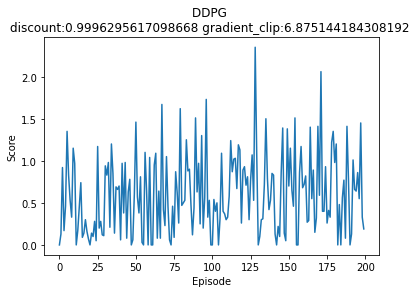

In [6]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k])
plt.title("DDPG \n{}".format(st))
plt.show()

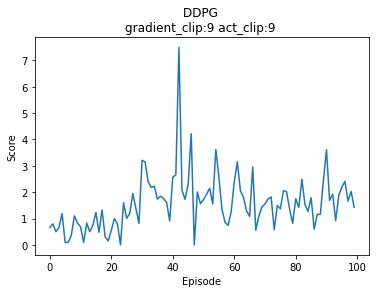

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k]) 
plt.title("DDPG \n{}".format(st))
plt.show()

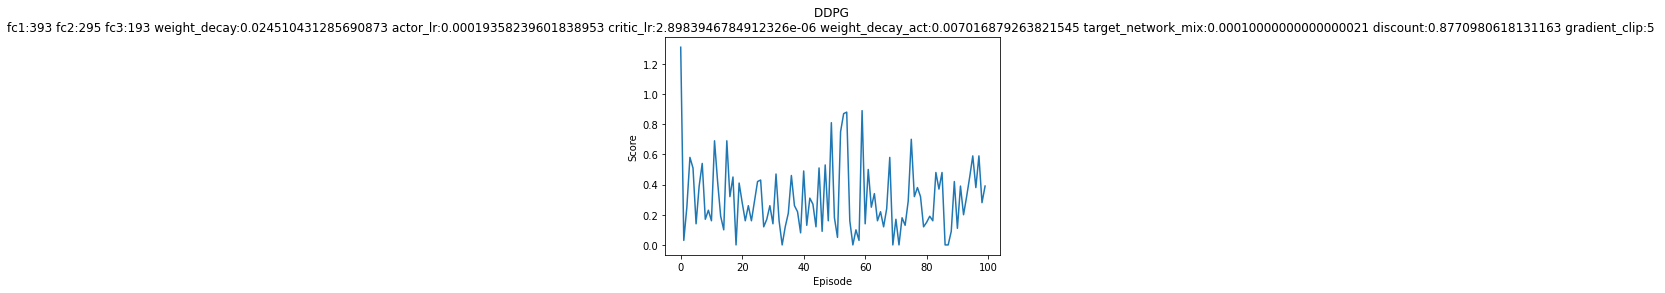

In [32]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
for k in config.update_fields:
    st += '{}:{} '.format(k,best[k]) 
plt.title("DDPG \n{}".format(st))
plt.show()

In [7]:
env.close()